# Mid-Course Project

Hi there,

I’m the host of a movie reviews podcast and I’m currently making an episode about movie review aggregators.

I found this data set from Rotten Tomatoes (inside the .ipynb file that I’ve attached). Could you dig into the data and share any interesting insights that you find? My audience loves fun facts about movies.

Thank you!\
KP

## 0. Read in the Data

In [5]:
# rotten tomatoes movie data set from Maven's data playground
import pandas as pd

movies = pd.read_csv('Rotten Tomatoes Movies.csv')
movies.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0


In [6]:
# let's work with a subset of the data for this project
movies = movies[['movie_title', 'rating', 'genre', 'in_theaters_date','runtime_in_minutes',
                 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']]
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0


## 1. Explore the Data

### How many movies are in this data set?

In [9]:
movies.shape

(16638, 9)

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   rating              16638 non-null  object 
 2   genre               16621 non-null  object 
 3   in_theaters_date    15823 non-null  object 
 4   runtime_in_minutes  16483 non-null  float64
 5   tomatometer_rating  16638 non-null  int64  
 6   tomatometer_count   16638 non-null  int64  
 7   audience_rating     16386 non-null  float64
 8   audience_count      16386 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


Filter the data to only include movies that came out in 2010 or later. How many movies are in this new data set?

In [12]:
import numpy as np
import pandas as pd
# Since 'in_theaters_date' column is not in datetime format, so need to convert object into datetime:
movies['in_theaters_date'] = pd.to_datetime(movies.in_theaters_date)
movies.head(3)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0


In [13]:
movies.shape

(16638, 9)

In [14]:
# Now extract year from 'in_theaters_date' column:
# Filter the data to only include movies that came out in 2010 or later
movies = movies[movies.in_theaters_date.dt.year >= 2010]
movies.head(3)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
97,Fireflies in the Garden,R,Drama,2011-10-14,98.0,22,54,45.0,45150.0


### Find the highest rated movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [16]:
# Highest Rated Movies According to critics (tomatometer_rating):
movies.sort_values('tomatometer_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
3093,"Batman: The Dark Knight Returns, Part 1",PG-13,"Action & Adventure, Animation",2012-01-01,134.0,100,5,93.0,8482.0
8500,King Georges,NR,Documentary,2016-02-26,78.0,100,9,54.0,240.0
8495,King Charles III,NR,Drama,2017-05-14,88.0,100,9,48.0,65.0
8477,Killing for Love (Das Versprechen),NR,"Art House & International, Documentary",2017-12-15,124.0,100,9,82.0,201.0
8461,Kill Zone 2 (Saat po long 2),NR,"Action & Adventure, Art House & International,...",2016-05-13,120.0,100,22,63.0,544.0


In [17]:
# Highest Rated Movies According to general audience (audience_rating):
movies.sort_values('audience_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
14566,The Miners' Hymns,NR,"Documentary, Drama, Special Interest",2012-02-08,52.0,100,10,100.0,148.0
9051,Little Monsters,R,"Comedy, Horror",2019-10-08,94.0,83,94,100.0,9.0
7137,Haunt,R,"Horror, Mystery & Suspense",2019-09-13,92.0,68,38,100.0,7.0
16438,Wonders of the Sea,NR,Documentary,2019-01-17,82.0,76,17,100.0,13.0
14580,The Most Dangerous Year,NR,Documentary,2019-04-12,90.0,91,11,100.0,40.0


### These top movies seem to have very few critics and audience members writing the reviews. We want to look at only the most popular movies. Filter the movies data set to only include movies that have 100k+ audience ratings. How many movies are in this data set?

#### Filtering the movies data set to only include movies that have 100k+ audience ratings:

In [20]:
movies_popular = movies[movies.audience_count > 100000]
movies_popular.shape

(316, 9)

### Now, Find the highest rated **popular** movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [22]:
# tomatometer_rating - movies that have 100k+
movies_popular.sort_values('tomatometer_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
7558,How to Train Your Dragon,PG,"Animation, Kids & Family, Science Fiction & Fa...",2010-03-26,98.0,99,208,91.0,312342.0
15416,Toy Story 3,G,"Animation, Comedy, Kids & Family",2010-06-18,103.0,98,305,89.0,606931.0
7925,Inside Out,PG,"Animation, Kids & Family",2015-06-19,94.0,98,357,89.0,136125.0
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
9355,Mad Max: Fury Road,R,"Action & Adventure, Science Fiction & Fantasy",2015-05-15,120.0,97,410,85.0,127428.0


In [23]:
# audience_rating - movies that have 100k+
movies_popular.sort_values('audience_rating', ascending=False)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
6950,Guardians of the Galaxy,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-08-01,121.0,91,316,92.0,254717.0
4077,Captain America: The Winter Soldier,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-04-04,136.0,90,292,92.0,281524.0
14397,The King's Speech,PG-13,Drama,2010-11-26,118.0,95,292,92.0,144306.0
14549,The Martian,PG-13,Science Fiction & Fantasy,2015-10-02,164.0,91,361,91.0,131093.0
...,...,...,...,...,...,...,...,...,...
8855,Legion,R,"Action & Adventure, Horror, Mystery & Suspense",2010-01-22,100.0,19,104,31.0,312684.0
8714,The Last Airbender,PG,"Action & Adventure, Kids & Family, Science Fic...",2010-07-01,103.0,5,189,30.0,321915.0
4275,Chernobyl Diaries,R,"Drama, Horror",2012-05-25,86.0,19,89,28.0,141874.0
8261,Jonah Hex,PG-13,"Action & Adventure, Drama, Horror, Western",2010-06-18,84.0,12,150,20.0,170670.0


### A lot of these popular movies seem to have a PG or PG-13 rating. How many movies fall under each type of rating?

*Use this popular movies data set going forward in this notebook.*

In [25]:
movies_popular['rating'].value_counts()

rating
PG-13    160
R        100
PG        51
G          5
Name: count, dtype: int64

### What is the average audience rating for each movie rating type? Which rating type is most highly rated?

In [27]:
# Using Groupby: 
movies_popular.groupby('rating')['audience_rating'].mean() # here rows will be rating and column's value will be mean of audience rating

rating
G        66.200000
PG       66.823529
PG-13    67.293750
R        63.010000
Name: audience_rating, dtype: float64

In [28]:
# Insights: Here we can see that pg-13 movies rated the highest

## 2. Create New Columns

### Create a column in the DataFrame called 'Animation' and return a 1 if a movie is an 'Animation' movie and 0 otherwise. Do the same for *Action & Adventure* and *Comedy*.

*Hint: use np.where and str.contains*

In [31]:
# Creating new columns:
# Making copy of the dataset->
movies_popular = movies[movies.audience_count > 100000].copy()
movies_popular

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
248,Tron Legacy,PG,"Action & Adventure, Science Fiction & Fantasy",2010-12-17,125.0,51,239,63.0,171385.0
265,The Last Song,PG,"Drama, Kids & Family, Romance",2010-03-31,107.0,20,118,66.0,160777.0
274,Repo Men,R,"Action & Adventure, Science Fiction & Fantasy",2010-03-19,119.0,22,151,41.0,100453.0
284,Predators,R,"Action & Adventure, Horror, Science Fiction & ...",2010-07-09,107.0,65,198,52.0,159760.0
...,...,...,...,...,...,...,...,...,...
16492,X-Men: Days of Future Past,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-05-23,131.0,90,318,91.0,276699.0
16493,X-Men: First Class,PG-13,"Action & Adventure, Drama, Science Fiction & F...",2011-06-03,132.0,86,290,87.0,184330.0
16591,Youth in Revolt,R,"Comedy, Drama, Romance",2010-01-08,90.0,66,170,52.0,114577.0
16612,Zero Dark Thirty,R,Drama,2013-01-11,157.0,91,289,80.0,196969.0


In [32]:
# Creating a column in the DataFrame where it contains 'Animation' using str.contains():
import numpy as np
movies_popular['Animation'] = np.where(movies_popular.genre.str.contains('Animation'), 1, 0)

In [33]:
# For Action movies:
movies_popular['Action'] = np.where(movies_popular.genre.str.contains('Action'), 1, 0)

In [34]:
# For Adventure movies:
movies_popular['Adventure'] = np.where(movies_popular.genre.str.contains('Adventure'), 1, 0)

In [35]:
# For Comedy movies:
movies_popular['Comedy'] = np.where(movies_popular.genre.str.contains('Comedy'), 1, 0)

In [36]:
movies_popular

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action,Adventure,Comedy
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,0,1,1,1
248,Tron Legacy,PG,"Action & Adventure, Science Fiction & Fantasy",2010-12-17,125.0,51,239,63.0,171385.0,0,1,1,0
265,The Last Song,PG,"Drama, Kids & Family, Romance",2010-03-31,107.0,20,118,66.0,160777.0,0,0,0,0
274,Repo Men,R,"Action & Adventure, Science Fiction & Fantasy",2010-03-19,119.0,22,151,41.0,100453.0,0,1,1,0
284,Predators,R,"Action & Adventure, Horror, Science Fiction & ...",2010-07-09,107.0,65,198,52.0,159760.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16492,X-Men: Days of Future Past,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-05-23,131.0,90,318,91.0,276699.0,0,1,1,0
16493,X-Men: First Class,PG-13,"Action & Adventure, Drama, Science Fiction & F...",2011-06-03,132.0,86,290,87.0,184330.0,0,1,1,0
16591,Youth in Revolt,R,"Comedy, Drama, Romance",2010-01-08,90.0,66,170,52.0,114577.0,0,0,0,1
16612,Zero Dark Thirty,R,Drama,2013-01-11,157.0,91,289,80.0,196969.0,0,0,0,0


### Create a table where each row is a rating, each column is a genre and each value is the number of movies of that particular rating and genre. What insights do you gather?

In [38]:
# Building a table:
movies_popular.groupby('rating')[['Animation', 'Action', 'Adventure', 'Comedy']].sum()

,Animation,Action,Adventure,Comedy
rating,,,,
G,5,3,3,5
PG,26,27,27,29
PG-13,0,102,102,35
R,0,41,41,35


### Find the average critic and audience rating for an Animation movie vs a non-Animation movie. Do the same for Action & Adventure and Comedy. What insights do you gather?

##### Finding Avg Critic for Animation vs Non Animation:

In [41]:
# Finding Avg Critic for Animation:
movies_popular.groupby('Animation')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
Animation,,
0,58.340351,64.831579
1,75.258065,75.161290


In [42]:
# Finding Avg Critic for Animation:
movies_popular.groupby('Action')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
Action,,
0,59.111888,65.391608
1,60.734104,66.219653


In [43]:
# Finding Avg Critic for Adventure:
movies_popular.groupby('Adventure')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
Adventure,,
0,59.111888,65.391608
1,60.734104,66.219653


In [44]:
# Finding Avg Critic for Comedy:
movies_popular.groupby('Comedy')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
Comedy,,
0,62.169811,67.353774
1,55.576923,62.769231


In [45]:
# Insights: After analyzing the average critic and audience rating for an Animation movie vs a non-Animation movie,
# The Animated movie Rated Highest among all the categories

## 3. Visualize the Data

### Create a pair plot from the popular movies DataFrame.

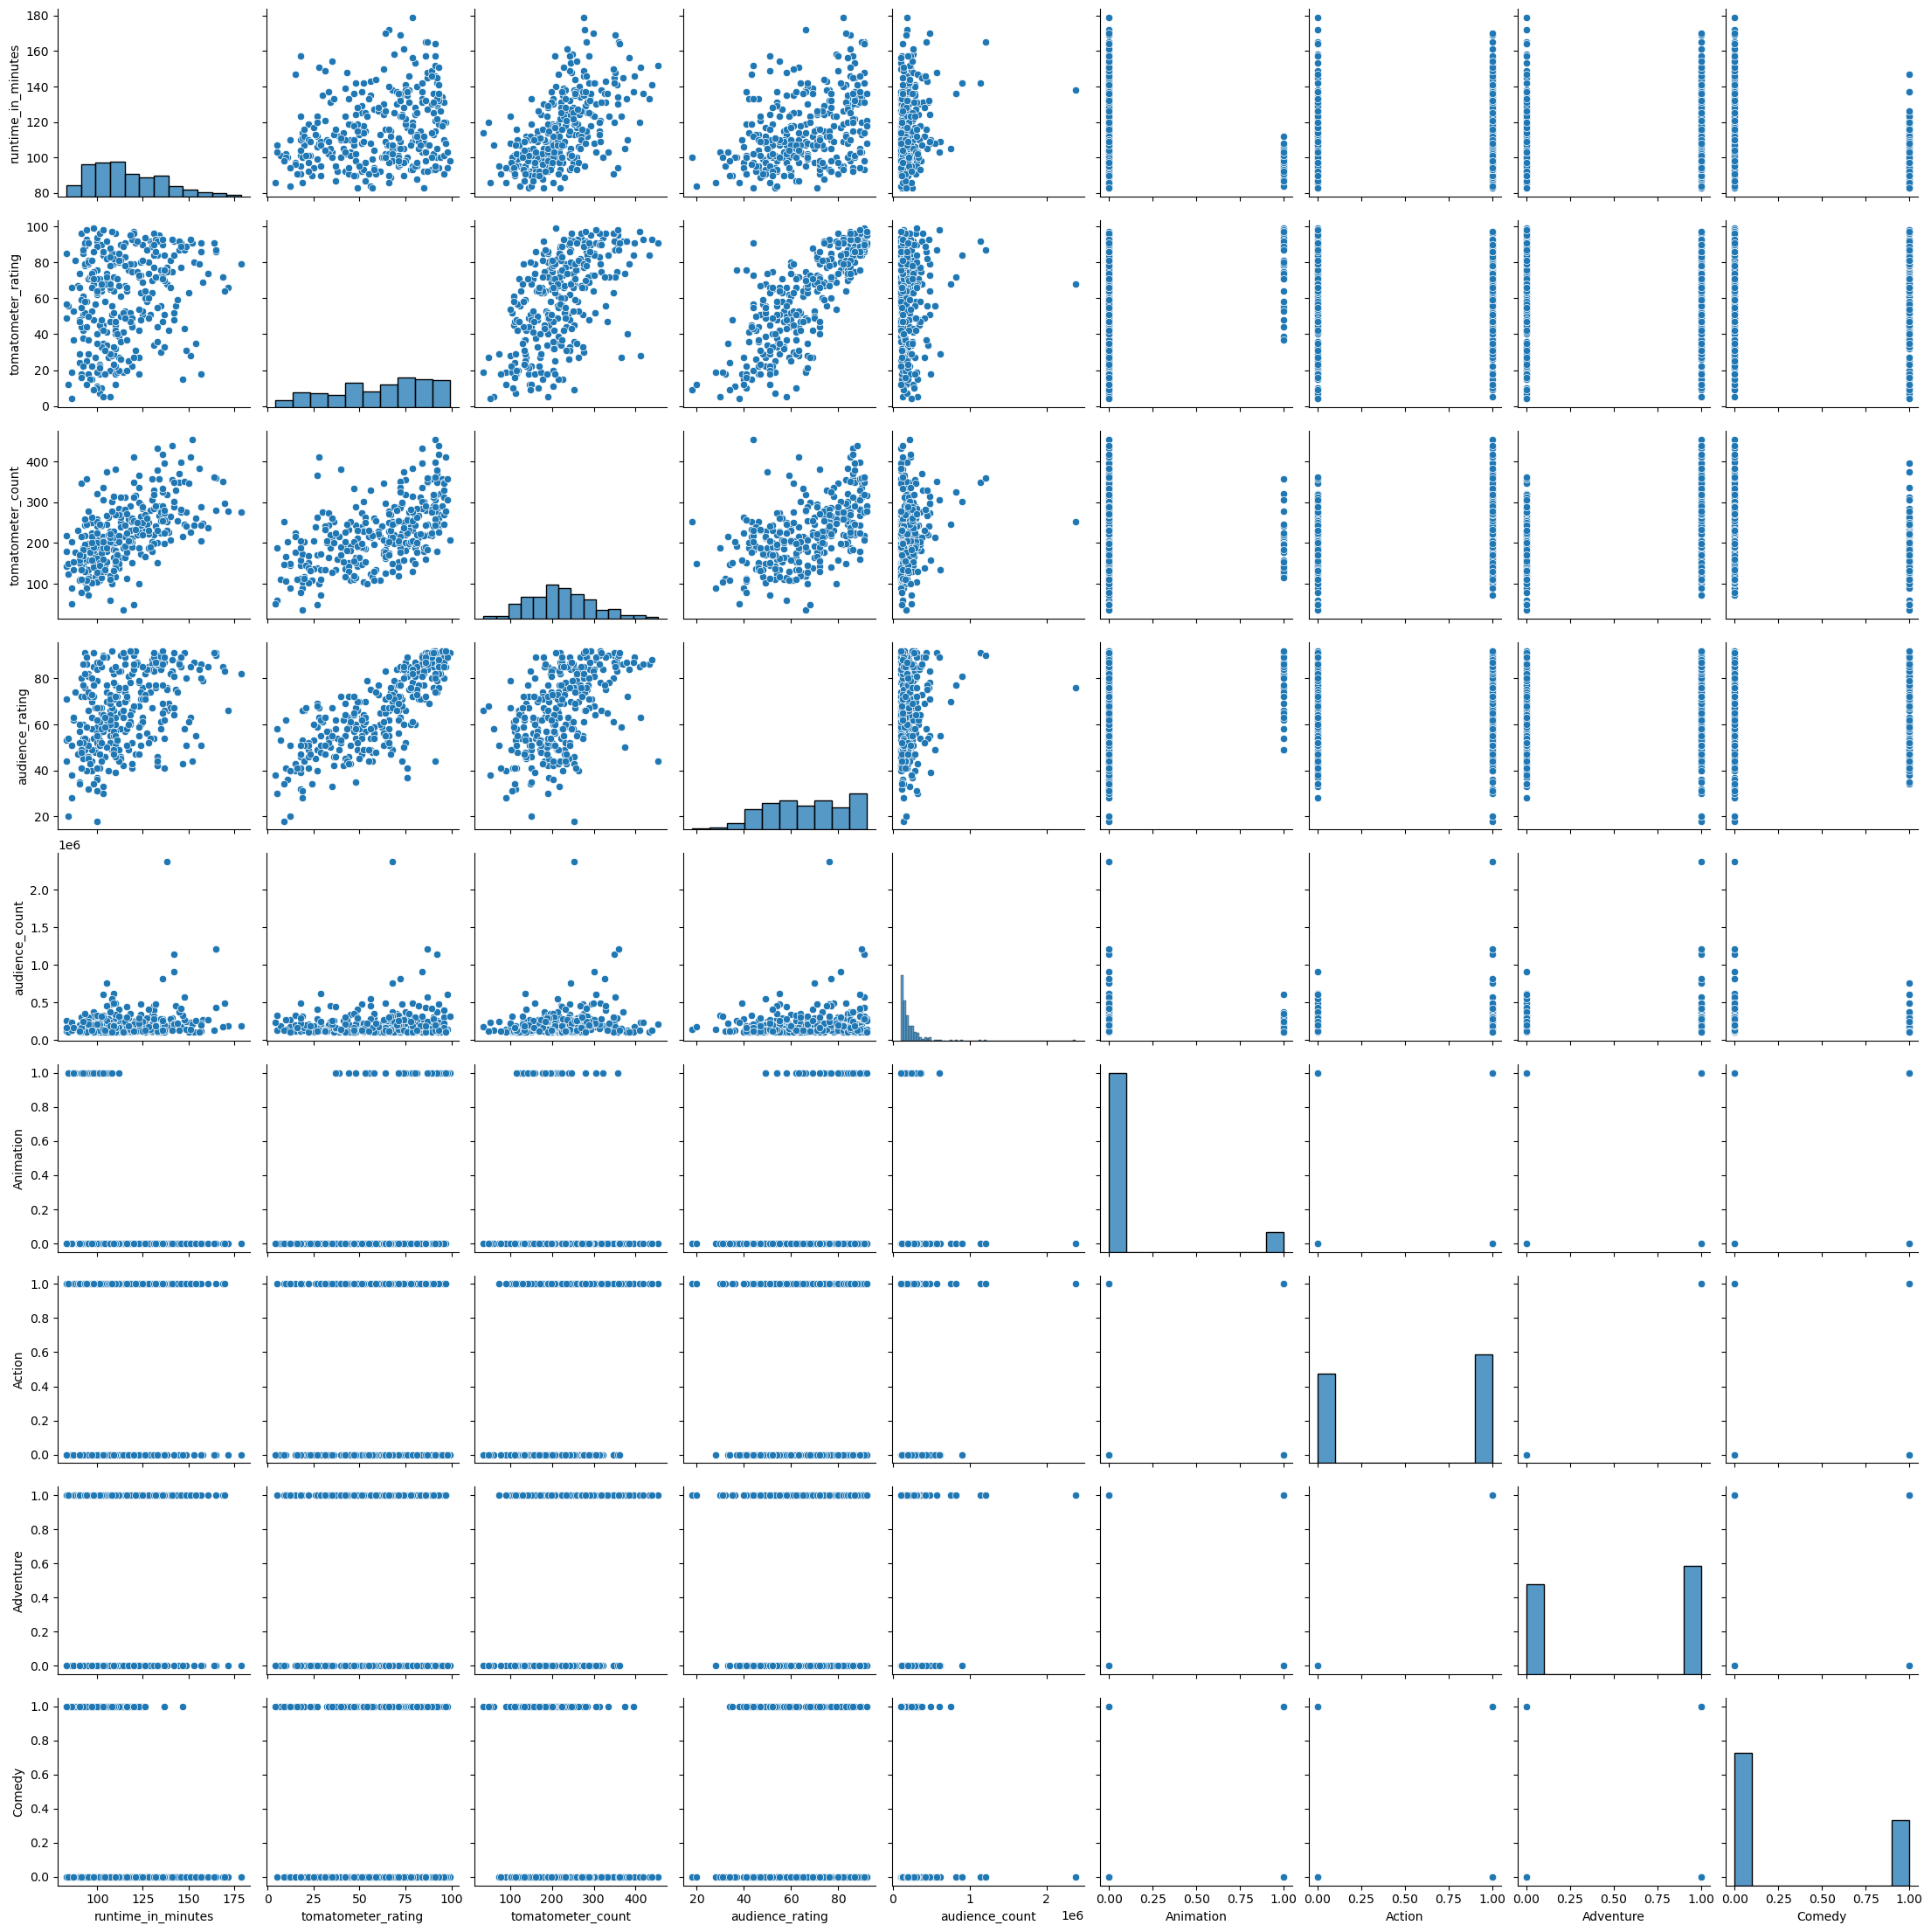

In [48]:
import seaborn as sns
sns.pairplot(movies_popular)

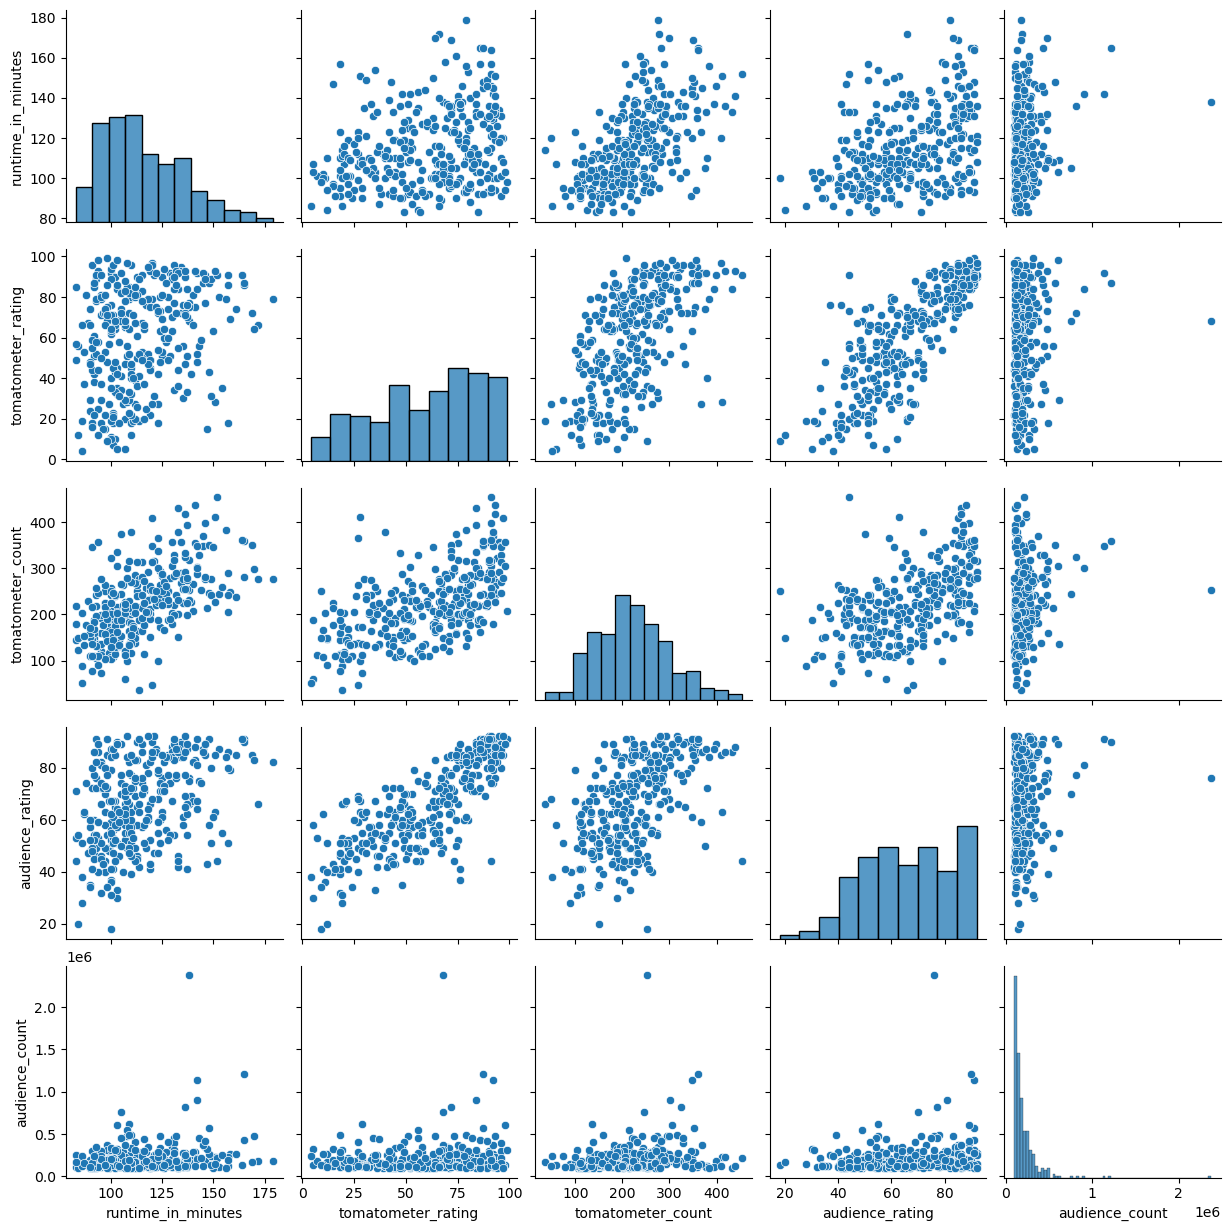

In [49]:
# Excluding the newly created last 4 Columns:
sns.pairplot(movies_popular.iloc[:,:-4])

What insights can you gather from this pair plot?
* How do the critic ratings (tomatometer_rating) compare with the audience ratings (compare the histograms)?
* What are some surprising findings about the run times of movies compared with other fields (look at the scatter plots)?
* What is the most popular movie by far in terms of the number of audience ratings?

#### Insights:

In [107]:
# 1. Audience_Rating and Tomatometer_Rating both columns are Highly correlated
# 2. run times of movies affect both Audience_Rating and Tomatometer_Rating as the time of the movies increases, rating increases mostly between 100 to 200 minutes

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action,Adventure,Comedy


In [109]:
movies_popular[movies_popular.audience_count > 1000000]

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action,Adventure,Comedy
1646,Shutter Island,R,"Action & Adventure, Drama, Mystery & Suspense",2010-02-19,138.0,68,253,76.0,2373625.0,0,1,1,0
9581,Marvel's The Avengers,PG-13,"Action & Adventure, Science Fiction & Fantasy",2012-05-04,142.0,92,348,91.0,1134955.0,0,1,1,0
13936,The Dark Knight Rises,PG-13,"Action & Adventure, Drama, Mystery & Suspense",2012-07-20,165.0,87,360,90.0,1210957.0,0,1,1,0


In [ ]:
# Here we can see, the movie 'Shutter Island' is the most popular movie in terms of Audience ratings Count.